In [41]:
# Dependencies
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [7]:
# Read exoplanet data
df = pd.read_csv("exoplanet_data.csv")
df = df.dropna(axis='columns', how='all')
df = df.dropna()
print(df.describe())
df.head()

       koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
count    6991.000000    6991.000000    6991.000000    6991.000000   
mean        0.157059       0.244743       0.202975       0.125018   
std         0.363882       0.429966       0.402243       0.330763   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
count  6991.000000     6.991000e+03     6.991000e+03  6991.000000   
mean     56.191248     1.851122e-03    -1.851122e-03   164.488820   
std     117.570962     7.184503e-03     7.184503e-03    67.020475   
min       0.259820     1.100000e-08    -1.568000e-01   120.515914   
25%       2.620126     5.005000e-

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [17]:
print(df.columns)
df_renamed=df.rename(columns={"koi_disposition":"Disposition",
                              "koi_fpflag_nt":"Not Transit Like",
                              "koi_fpflag_ss":"Stellar Eclipse",
                              "koi_fpflag_co":"Centroid Offset",
                              "koi_fpflag_ec":"Ephemeris Match Indicates Contamination",
                              "koi_period":"Orbital Period (Days)",
                              "koi_period_err1":"Orbital Period Positive Error",
                              "koi_period_err2":"Orbital Period Negative Error",
                              "koi_time0bk":"Transit Epoch (BJD - 2,454,833 Days)",
                              "koi_time0bk_err1":"Transit Epoch Positive Error",
                              "koi_time0bk_err2":"Transit Epoch Negative Error",
                              "koi_impact":"Impact",
                              "koi_impact_err1":"Impact Positive Error",
                              "koi_impact_err2":"Impact Negative Error",
                              "koi_duration":"Transit Duration (Hrs)",
                              "koi_duration_err1":"Transit Duration Postive Error",
                              "koi_duration_err2":"Transit Duration Negative Error",
                              "koi_depth":"Transit Depth (Parts/M)",
                              "koi_depth_err1":"Transit Depth Positive Error",
                              "koi_depth_err2":"Transit Depth Negative Error",
                              "koi_prad":"Planetary Radius (Earth Radii)",
                              "koi_prad_err1":"Planetary Radius Positive Error",
                              "koi_prad_err2":"Planetary Radius Negative Error",
                              "koi_teq":"Equilibrium Temperature (K)",
                              "koi_insol":"Insolation Flux (Earth Flux)",
                              "koi_insol_err1":"Insolation Flux Positive Error",
                              "koi_insol_err2":"Insolation Flux Negative Error",
                              "koi_model_snr":"Transit Signal-to-Noise",
                              "koi_tce_plnt_num":"TCE Planet Number",
                              "koi_steff":"Stellar Effective Temperature (K)",
                              "koi_steff_err1":"Stellar Effective Temperature Positive Error",
                              "koi_steff_err2":"Stellar Effective Temperature Negative Error",
                              "koi_slogg":"Stellar Surface Gravity",
                              "koi_slogg_err1":"Stellar Surface Gravity Positive Error",
                              "koi_slogg_err2":"Stellar Surface Gravity Negative Error",
                              "koi_srad":"Stellar Radius (Solar Radii)",
                              "koi_srad_err1":"Stellar Radius Positive Error",
                              "koi_srad_err2":"Stellar Radius Negative Error",
                              "ra":"KIC Right Ascension (Degrees)",
                              "dec":"KIC Declination (Degrees)",
                              "koi_kepmag":"Kepler-band (Magnitude)"
                  })
print(df_renamed.columns)
df_renamed["Confirmed"] = df_renamed["Disposition"].apply(lambda x: 1 if x == "CONFIRMED" else 0)
df_renamed.head()

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')
Index(['Disposition', 'Not Transit Like', 'Stellar Eclipse', 'Centroid Offset',
       'Ephemeris Match Indicates Contamination', 'Orbital Period (Days)',
       'Orbital Period Positive Error', 'Orbital Period Negative Error',
     

,Disposition,Not Transit Like,Stellar Eclipse,Centroid Offset,Ephemeris Match Indicates Contamination,Orbital Period (Days),Orbital Period Positive Error,Orbital Period Negative Error,"Transit Epoch (BJD - 2,454,833 Days)",Transit Epoch Positive Error,...,Stellar Surface Gravity,Stellar Surface Gravity Positive Error,Stellar Surface Gravity Negative Error,Stellar Radius (Solar Radii),Stellar Radius Positive Error,Stellar Radius Negative Error,KIC Right Ascension (Degrees),KIC Declination (Degrees),Kepler-band (Magnitude),Confirmed
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1


In [24]:
df_all = df_renamed[[
    'Confirmed',
    'Not Transit Like',
    'Stellar Eclipse',
    'Centroid Offset',
    'Ephemeris Match Indicates Contamination',
    'Orbital Period (Days)',
    'Transit Epoch (BJD - 2,454,833 Days)',
    'Impact',
    'Transit Duration (Hrs)',
    'Transit Depth (Parts/M)',
    'Planetary Radius (Earth Radii)',
    'Equilibrium Temperature (K)',
    'Insolation Flux (Earth Flux)',
    'Transit Signal-to-Noise',
    'Stellar Effective Temperature (K)',
    'Stellar Surface Gravity',
    'Stellar Radius (Solar Radii)',
    'KIC Right Ascension (Degrees)',
    'KIC Declination (Degrees)',
    'Kepler-band (Magnitude)'
]]
print(df_all.columns)
df_all.head()

Index(['Confirmed', 'Not Transit Like', 'Stellar Eclipse', 'Centroid Offset',
       'Ephemeris Match Indicates Contamination', 'Orbital Period (Days)',
       'Transit Epoch (BJD - 2,454,833 Days)', 'Impact',
       'Transit Duration (Hrs)', 'Transit Depth (Parts/M)',
       'Planetary Radius (Earth Radii)', 'Equilibrium Temperature (K)',
       'Insolation Flux (Earth Flux)', 'Transit Signal-to-Noise',
       'Stellar Effective Temperature (K)', 'Stellar Surface Gravity',
       'Stellar Radius (Solar Radii)', 'KIC Right Ascension (Degrees)',
       'KIC Declination (Degrees)', 'Kepler-band (Magnitude)'],
      dtype='object')


,Confirmed,Not Transit Like,Stellar Eclipse,Centroid Offset,Ephemeris Match Indicates Contamination,Orbital Period (Days),"Transit Epoch (BJD - 2,454,833 Days)",Impact,Transit Duration (Hrs),Transit Depth (Parts/M),Planetary Radius (Earth Radii),Equilibrium Temperature (K),Insolation Flux (Earth Flux),Transit Signal-to-Noise,Stellar Effective Temperature (K),Stellar Surface Gravity,Stellar Radius (Solar Radii),KIC Right Ascension (Degrees),KIC Declination (Degrees),Kepler-band (Magnitude)
0,1,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,5455,4.467,0.927,291.93423,48.141651,15.347
1,0,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,5853,4.544,0.868,297.00482,48.134129,15.436
2,0,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,5805,4.564,0.791,285.53461,48.285210,15.597
3,1,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,6031,4.438,1.046,288.75488,48.226200,15.509
4,1,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,6046,4.486,0.972,296.28613,48.224670,15.714


In [32]:
df_boolean = df_all.iloc[:,:5]
df_boolean.groupby(['Confirmed']).mean()

,Not Transit Like,Stellar Eclipse,Centroid Offset,Ephemeris Match Indicates Contamination
Confirmed,,,,
0,0.208245,0.325563,0.272202,0.168176
1,0.009444,0.011667,0.003333,0.000556


Confirmed by Orbital Period (Days)


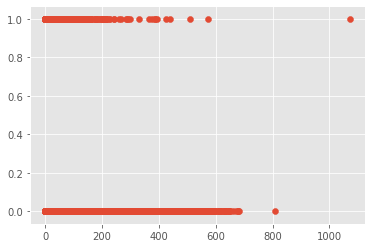

Confirmed by Transit Epoch (BJD - 2,454,833 Days)


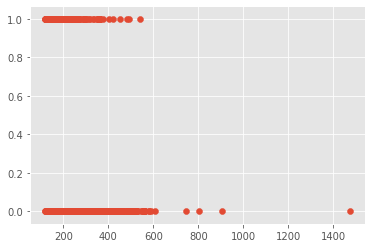

Confirmed by Impact


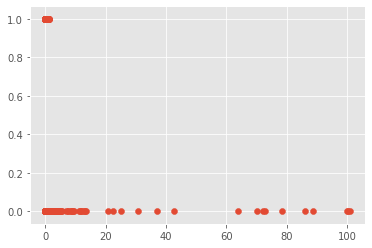

Confirmed by Transit Duration (Hrs)


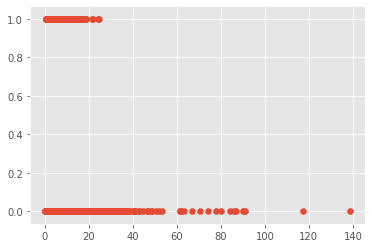

Confirmed by Transit Depth (Parts/M)


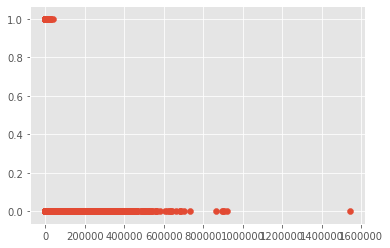

Confirmed by Planetary Radius (Earth Radii)


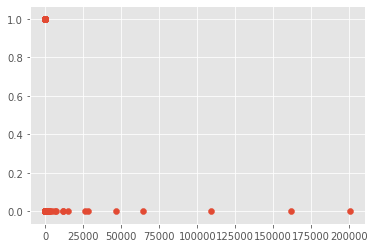

Confirmed by Equilibrium Temperature (K)


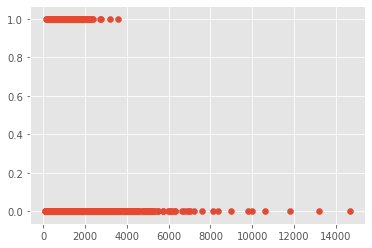

Confirmed by Insolation Flux (Earth Flux)


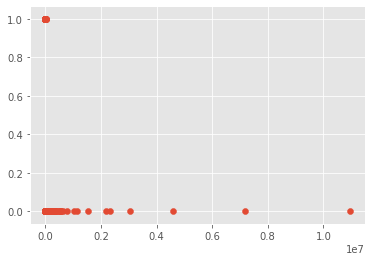

Confirmed by Transit Signal-to-Noise


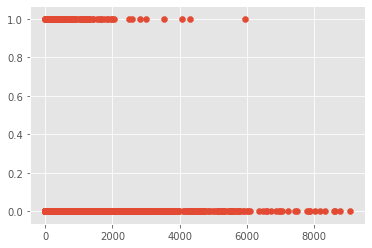

Confirmed by Stellar Effective Temperature (K)


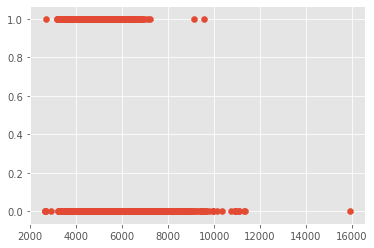

Confirmed by Stellar Surface Gravity


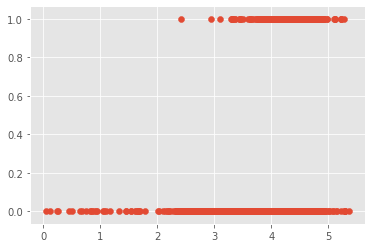

Confirmed by Stellar Radius (Solar Radii)


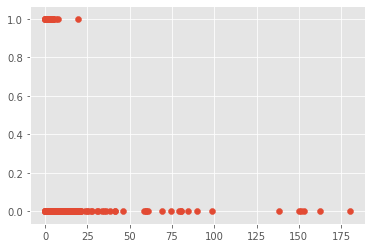

Confirmed by KIC Right Ascension (Degrees)


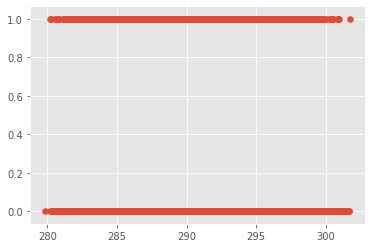

Confirmed by KIC Declination (Degrees)


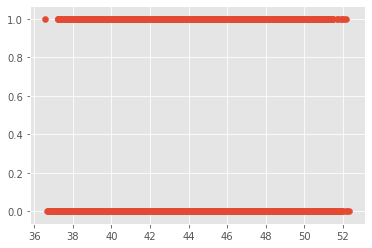

Confirmed by Kepler-band (Magnitude)


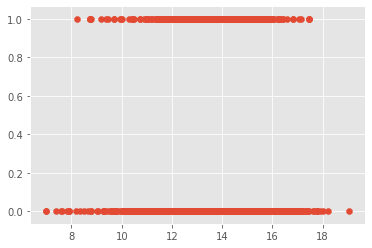

In [35]:
for column in df_all.columns[5:]:
    if column != "Confirmed":
        print(f"Confirmed by {column}")
        plt.scatter(df_all[column],df_all["Confirmed"])
        plt.show()

In [45]:
y = df_all["Confirmed"]
y

0       1
1       0
2       0
3       1
4       1
       ..
6986    0
6987    0
6988    0
6989    0
6990    0
Name: Confirmed, Length: 6991, dtype: int64

In [51]:
predictors = [
    "Not Transit Like",
    "Stellar Eclipse",
    "Centroid Offset",
    "Ephemeris Match Indicates Contamination",
    "Impact",
    "Transit Duration (Hrs)",
    "Transit Depth (Parts/M)",
    "Planetary Radius (Earth Radii)",
    "Equilibrium Temperature (K)",
    "Insolation Flux (Earth Flux)",
    "Transit Signal-to-Noise",
    "Stellar Effective Temperature (K)",
    "Stellar Surface Gravity",
    "Stellar Radius (Solar Radii)"
]
predictors_series = df_all[[
    "Not Transit Like",
    "Stellar Eclipse",
    "Centroid Offset",
    "Ephemeris Match Indicates Contamination",
    "Impact",
    "Transit Duration (Hrs)",
    "Transit Depth (Parts/M)",
    "Planetary Radius (Earth Radii)",
    "Equilibrium Temperature (K)",
    "Insolation Flux (Earth Flux)",
    "Transit Signal-to-Noise",
    "Stellar Effective Temperature (K)",
    "Stellar Surface Gravity",
    "Stellar Radius (Solar Radii)"
]]
predictors_series.head()

,Not Transit Like,Stellar Eclipse,Centroid Offset,Ephemeris Match Indicates Contamination,Impact,Transit Duration (Hrs),Transit Depth (Parts/M),Planetary Radius (Earth Radii),Equilibrium Temperature (K),Insolation Flux (Earth Flux),Transit Signal-to-Noise,Stellar Effective Temperature (K),Stellar Surface Gravity,Stellar Radius (Solar Radii)
0,0,0,0,0,0.586,4.50700,874.8,2.83,443,9.11,25.8,5455,4.467,0.927
1,0,1,0,0,0.969,1.78220,10829.0,14.60,638,39.30,76.3,5853,4.544,0.868
2,0,1,0,0,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,5805,4.564,0.791
3,0,0,0,0,0.701,1.65450,603.3,2.75,1406,926.16,40.9,6031,4.438,1.046
4,0,0,0,0,0.762,3.14020,686.0,2.77,1160,427.65,40.2,6046,4.486,0.972


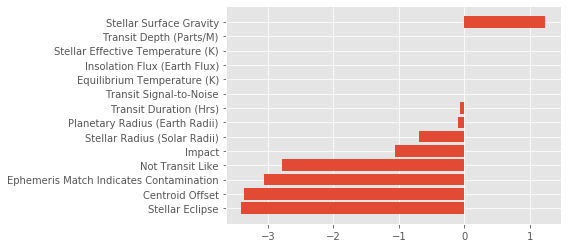

,Variable,Intercept,Coefficient,Training Score,Testing Score
1,Stellar Eclipse,-6.647774e-01,-3.413226,0.742514,0.742563
2,Centroid Offset,-7.690481e-01,-3.374228,0.742514,0.742563
3,Ephemeris Match Indicates Contamination,-8.901399e-01,-3.063982,0.742514,0.742563
0,Not Transit Like,-8.527175e-01,-2.786178,0.742514,0.742563
4,Impact,-5.107019e-01,-1.063886,0.742514,0.742563
13,Stellar Radius (Solar Radii),-2.484398e-01,-0.698546,0.742514,0.742563
7,Planetary Radius (Earth Radii),-4.618683e-01,-0.088591,0.742514,0.742563
5,Transit Duration (Hrs),-7.046268e-01,-0.071421,0.742514,0.742563
10,Transit Signal-to-Noise,-8.801868e-01,-0.001111,0.742514,0.742563
8,Equilibrium Temperature (K),-3.233679e-01,-0.000768,0.742514,0.742563


In [77]:
# Logistic Regression
output = pd.DataFrame(columns = ["Variable","Intercept","Coefficient","Training Score","Testing Score"])
index = 0
for predictor in predictors:
    y = df_all["Confirmed"]
    X = df_all[[predictor]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)
    trained_regressor = LogisticRegression().fit(X_test, y_test)
    output = output.append({
        "Variable": predictor,
        "Intercept": trained_regressor.intercept_[0],
        "Coefficient": trained_regressor.coef_[0][0],
        "Training Score": train_score,
        "Testing Score": test_score},
        ignore_index=True)
    index = index + 1
output = output.sort_values(by=["Coefficient"])
plt.barh(output["Variable"],output["Coefficient"])
plt.show()
output